In [58]:
import fugashi
import argparse
from pathlib import Path
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import spacy

In [3]:
tagger = fugashi.Tagger() # Initialize MeCab tagger

In [4]:
# Read input file (Japanese-language .txt file)
input_path = Path(input('Input data path... (relative to this Jupyter notebook)'))
print('Reading from {}'.format(input_path))
input_file = open(input_path, mode='r', encoding='utf-8')
input_text = input_file.read()

Reading from ..\data\hikari-no-naka-ni.txt


## Frequency of Parts of Speech (品詞の頻度)

In [13]:
tokens = tagger(input_text) # Get tokens, see documentation for fields
pos = [token.feature.pos1 for token in tokens]

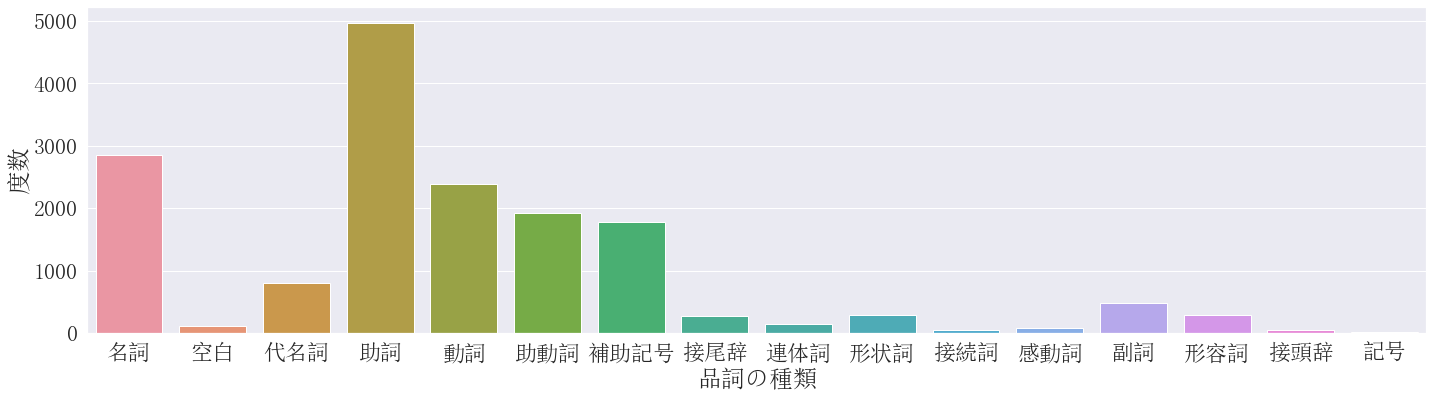

In [61]:
sns.set(rc={'figure.figsize': (24, 6)})
sns.set(font='SimSun', font_scale=2)

ax = sns.countplot(x=pos)
ax.set(xlabel='品詞の種類', ylabel='度数')
plt.show()

## Sentence Length (文当たりの字数)

Calculated in terms of number of characters.

In [38]:
nlp = spacy.load('ja_core_news_sm') # Use spaCy
nlp.add_pipe('sentencizer')
doc = nlp(input_text) # Load text into spaCy

In [47]:
sentence_lengths = [len(str(sentence)) for sentence in doc.sents]

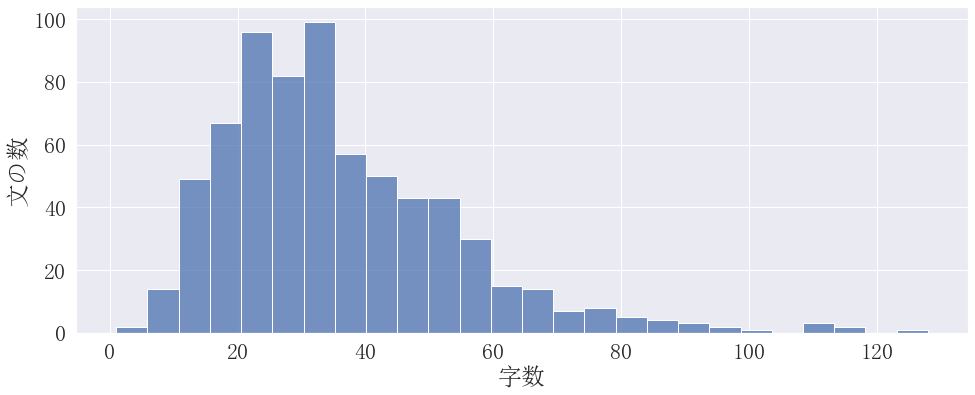

In [62]:
sns.set(rc={'figure.figsize': (16, 6)})
sns.set(font="SimSun", font_scale=2)

ax = sns.histplot(data=sentence_lengths)
ax.set(xlabel='字数', ylabel='文の数')
plt.show()